# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [37]:
import requests

buscar = "botines predator"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

response = requests.request("GET", url)
print(response)

response.text

data = response.json()

<Response [200]>


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [38]:
precios = []
long = data["paging"]["total"]

for i in range(0, 50): 
    precios.append(data['results'][i]['price'])
        
print(precios)

promedio = sum(precios) / len(precios)

print(promedio)

[149999, 80499, 149999, 68999, 149999, 149999, 104999, 149999, 70999, 114999, 149999, 104999, 104999, 149999, 51999, 104999, 104999, 114999, 149999, 65999, 104999, 114999, 149999, 83999, 104999, 56799, 114999, 104999, 83999, 149999, 149999, 179999, 149999, 104999, 149999, 125999, 114999, 125999, 94999, 125999, 125999, 70999, 239999, 179999, 149999, 149999, 104999, 85199, 70999, 70999]
118709.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

Exception ignored in: <function ZipFile.__del__ at 0x000001F5D216CA40>
Traceback (most recent call last):
  File "C:\Users\tomas\anaconda3\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "C:\Users\tomas\anaconda3\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


(array([ 4.,  8., 11.,  9.,  0., 15.,  2.,  0.,  0.,  1.]),
 array([ 51999.,  70799.,  89599., 108399., 127199., 145999., 164799.,
        183599., 202399., 221199., 239999.]),
 <BarContainer object of 10 artists>)

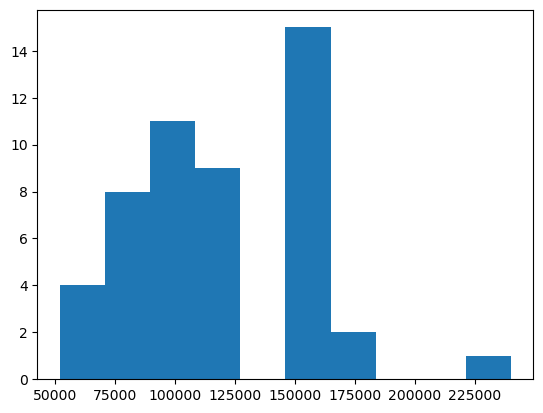

In [39]:
import matplotlib.pyplot as plt

plt.hist(precios)

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [40]:
import requests

buscar_1 = "fravega"
url_1 = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar_1.replace(" ", "%20"))

response_1 = requests.request("GET", url_1)
print(response)

response_1.text

#data_1 = response_1.json()

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"fravega","paging":{"total":990,"primary_results":990,"offset":0,"limit":50},"results":[{"id":"MLA1316290820","title":"Ventilador De Pie Digital 20 Moulinex Ve4081b2 + Control","condition":"new","thumbnail_id":"665037-MLU75357536035_032024","catalog_product_id":"MLA20893886","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/ventilador-de-pie-digital-20-moulinex-ve4081b2-control/p/MLA20893886","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1645","domain_id":"MLA-FANS","thumbnail":"http://http2.mlstatic.com/D_665037-MLU75357536035_032024-I.jpg","currency_id":"ARS","order_backend":1,"price":71668,"original_price":null,"sale_price":null,"available_quantity":1,"official_store_id":null,"use_thumbnail_id":true,"accepts_mercadopago":true,"shipping":{"store_pick_up":false,"free_shipping":true,"logistic_type":"cross_docking","mode":"me2","tags":["self_service_in","mandatory_free_shipping"]

In [41]:
precio_original = []
precio_actual = []

for i in range(0, 50): 
    precio_original.append(data['results'][i]['original_price'])
    precio_actual.append(data['results'][i]['price'])
    
print(type(precio_original[0]))
print(precio_original)

ahorro = []    
for i in range(0, len(precio_actual)):
    if precio_original[i] != None:
        ahorro.append(precio_original[i] - precio_actual[i])
    
print(ahorro)

#Para los productos con un precio original y actual encontramos la diferencia para calcular el ahorro. 

<class 'NoneType'>
[None, None, None, None, None, None, None, None, 70999, None, None, None, None, None, None, None, None, None, None, None, 104999, None, None, 104999, None, 70999, None, None, 104999, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[0, 0, 21000, 14200, 21000]


In [53]:
ship = []

for i in range(0, 50):
    ship.append(data['results'][i]['shipping']['free_shipping'])
    
print(ship)    

free_shipping = 0
for i in range(0, len(ship)):
    if ship[i] == True:
        free_shipping += 1
        
        
print(free_shipping)

percent_fs = (free_shipping / len(ship)) *100

print(percent_fs, "%")

#Buscamos que porcentaje de los productos cuentan con envio gratis. 

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
50
100.0 %


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
#Importamos las librerias que vamos a usar


In [43]:
#seteamos el root del link
link = "https://www.lanacion.com.ar/"

#Extraemos el codigo HTML
r = requests.get(link)
contenido = r.content

#Nos quedamos con la parte que nos interesa
soup = BeautifulSoup(contenido, "html.parser")

desc_selector = '.description-container'
desc_elements = soup.select(desc_selector)



In [44]:
# Listas para almacenar los datos
links = []
categories = []

#Creamos un loop para quedarnos con los links de cada articulo, sumando la root a la parte especifica de cada articulo
for element in desc_elements:
    href_value = element.get('href')
    if href_value:
        full_url = link + href_value
        category = href_value.split('/')[1]
        links.append(full_url)
        categories.append(category)


In [45]:
# Creamos un DataFrame con Pandas
df = pd.DataFrame({'Enlace': links,})

# Exportamos el DataFrame a un archivo Excel. Cambiar ruta de descarga
df.to_excel("links.xlsx", index=False)